Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
# Load train, validation, and test datasets
train_data = pd.read_csv("train.csv")
validation_data = pd.read_csv("validation.csv")
test_data = pd.read_csv("test.csv")

In [33]:
train_data.head()

,label,message
0,1,goal arsenal henry v liverpool henry scores...
1,0,they said if its gonna snow it will start arou...
2,0,aah bless hows your arm
3,0,oh k i will come tomorrow
4,0,whats happening with you have you gotten a job...


In [3]:
# Separate features and labels
X_train, y_train = train_data['message'], train_data['label']
X_validation, y_validation = validation_data['message'], validation_data['label']
X_test, y_test = test_data['message'], test_data['label']

In [4]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = X_train.fillna('')
X_validation = X_validation.fillna('')
X_test = X_test.fillna('')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_validation_tfidf = vectorizer.transform(X_validation)
X_test_tfidf = vectorizer.transform(X_test)

#Defining the utility functions#

In [5]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model


In [6]:
def score_model(model, X, y):
    y_pred = model.predict(X)
    return {
        "accuracy": accuracy_score(y, y_pred),
        "precision": precision_score(y, y_pred),
        "recall": recall_score(y, y_pred),
        "f1_score": f1_score(y, y_pred)
    }


In [7]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print("Classification Report:")
    print(classification_report(y, y_pred))


In [8]:
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=3)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    return grid_search.best_estimator_


Fitting the models

###1. Logistic Regression###

In [9]:
# Fit on Training Data
logistic_model = LogisticRegression(class_weight='balanced', solver='liblinear', C=1.0, random_state=42)
fitted_logistic_model = fit_model(logistic_model, X_train_tfidf, y_train)

In [10]:
# Score on Training Data
train_scores = score_model(fitted_logistic_model, X_train_tfidf, y_train)
print("Training Scores:", train_scores)

# Score on Validation Data
validation_scores = score_model(fitted_logistic_model, X_validation_tfidf, y_validation)
print("Validation Scores:", validation_scores)

# Evaluate on Training Data
print("Evaluating on Training Data:")
evaluate_model(fitted_logistic_model, X_train_tfidf, y_train)

# Evaluate on Validation Data
print("Evaluating on Validation Data:")
evaluate_model(fitted_logistic_model, X_validation_tfidf, y_validation)

Training Scores: {'accuracy': 0.99, 'precision': 0.9432234432234432, 'recall': 0.9847036328871893, 'f1_score': 0.9635173058933583}
Validation Scores: {'accuracy': 0.9784688995215312, 'precision': 0.9122807017543859, 'recall': 0.9285714285714286, 'f1_score': 0.9203539823008849}
Evaluating on Training Data:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3377
           1       0.94      0.98      0.96       523

    accuracy                           0.99      3900
   macro avg       0.97      0.99      0.98      3900
weighted avg       0.99      0.99      0.99      3900

Evaluating on Validation Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       724
           1       0.91      0.93      0.92       112

    accuracy                           0.98       836
   macro avg       0.95      0.96      0.95       836
weighted avg     

###2. Random Forest Classifier###

In [11]:
# Fit on Training Data
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced',random_state=42)
fitted_rf_model = fit_model(rf_model, X_train_tfidf, y_train)

In [12]:
# Score on Training Data
train_scores = score_model(fitted_rf_model, X_train_tfidf, y_train)
print("Training Scores:", train_scores)

# Score on Validation Data
validation_scores = score_model(fitted_rf_model, X_validation_tfidf, y_validation)
print("Validation Scores:", validation_scores)

# Evaluate on Training Data
print("Evaluating on Training Data:")
evaluate_model(fitted_rf_model, X_train_tfidf, y_train)

# Evaluate on Validation Data
print("Evaluating on Validation Data:")
evaluate_model(fitted_rf_model, X_validation_tfidf, y_validation)

Training Scores: {'accuracy': 0.9835897435897436, 'precision': 0.9956803455723542, 'recall': 0.8814531548757171, 'f1_score': 0.9350912778904665}
Validation Scores: {'accuracy': 0.9665071770334929, 'precision': 0.9883720930232558, 'recall': 0.7589285714285714, 'f1_score': 0.8585858585858586}
Evaluating on Training Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3377
           1       1.00      0.88      0.94       523

    accuracy                           0.98      3900
   macro avg       0.99      0.94      0.96      3900
weighted avg       0.98      0.98      0.98      3900

Evaluating on Validation Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       724
           1       0.99      0.76      0.86       112

    accuracy                           0.97       836
   macro avg       0.98      0.88      0.92       836
wei

###3.SVC###

In [13]:
# Fit on Training Data
svc_model= SVC(kernel='linear', C=0.1, class_weight='balanced', random_state=42)

fitted_svc_model = fit_model(svc_model, X_train_tfidf, y_train)

In [14]:
# Score on Training Data
train_scores = score_model(fitted_svc_model, X_train_tfidf, y_train)
print("Training Scores:", train_scores)

# Score on Validation Data
validation_scores = score_model(fitted_svc_model, X_validation_tfidf, y_validation)
print("Validation Scores:", validation_scores)

# Evaluate on Training Data
print("Evaluating on Training Data:")
evaluate_model(fitted_svc_model, X_train_tfidf, y_train)

# Evaluate on Validation Data
print("Evaluating on Validation Data:")
evaluate_model(fitted_svc_model, X_validation_tfidf, y_validation)

Training Scores: {'accuracy': 0.9846153846153847, 'precision': 0.9343339587242027, 'recall': 0.9521988527724665, 'f1_score': 0.9431818181818182}
Validation Scores: {'accuracy': 0.9760765550239234, 'precision': 0.9035087719298246, 'recall': 0.9196428571428571, 'f1_score': 0.911504424778761}
Evaluating on Training Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3377
           1       0.93      0.95      0.94       523

    accuracy                           0.98      3900
   macro avg       0.96      0.97      0.97      3900
weighted avg       0.98      0.98      0.98      3900

Evaluating on Validation Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       724
           1       0.90      0.92      0.91       112

    accuracy                           0.98       836
   macro avg       0.95      0.95      0.95       836
weig

###4. Complement Naive Baye's###

In [15]:
from sklearn.naive_bayes import ComplementNB

# Initialize the model
nb_model = ComplementNB()

# Fit the model
fitted_nb_model = fit_model(nb_model, X_train_tfidf, y_train)

# Score on Training Data
train_scores = score_model(fitted_nb_model, X_train_tfidf, y_train)
print("Training Scores:", train_scores)

# Score on Validation Data
validation_scores = score_model(fitted_nb_model, X_validation_tfidf, y_validation)
print("Validation Scores:", validation_scores)

# Evaluate on Training Data
print("Evaluating on Training Data:")
evaluate_model(fitted_nb_model, X_train_tfidf, y_train)

# Evaluate on Validation Data
print("Evaluating on Validation Data:")
evaluate_model(fitted_nb_model, X_validation_tfidf, y_validation)


Training Scores: {'accuracy': 0.9792307692307692, 'precision': 0.9032846715328468, 'recall': 0.9464627151051626, 'f1_score': 0.9243697478991597}
Validation Scores: {'accuracy': 0.9712918660287081, 'precision': 0.9074074074074074, 'recall': 0.875, 'f1_score': 0.8909090909090909}
Evaluating on Training Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3377
           1       0.90      0.95      0.92       523

    accuracy                           0.98      3900
   macro avg       0.95      0.97      0.96      3900
weighted avg       0.98      0.98      0.98      3900

Evaluating on Validation Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       724
           1       0.91      0.88      0.89       112

    accuracy                           0.97       836
   macro avg       0.94      0.93      0.94       836
weighted avg    

##Evaluating performance on test dataset##

In [22]:
#Testing Logistic Regression
# On Test Data - Scoring
test_scores = score_model(fitted_logistic_model, X_test_tfidf, y_test)
print("Test Scores:", test_scores)

# On Test Data - Detailed Evaluation
print("Detailed Evaluation on Test Data:")
evaluate_model(fitted_logistic_model, X_test_tfidf, y_test)


Test Scores: {'accuracy': 0.972488038277512, 'precision': 0.8803418803418803, 'recall': 0.9196428571428571, 'f1_score': 0.8995633187772926}
Detailed Evaluation on Test Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       724
           1       0.88      0.92      0.90       112

    accuracy                           0.97       836
   macro avg       0.93      0.95      0.94       836
weighted avg       0.97      0.97      0.97       836



In [20]:
#Testing the Random Forest model
# Score on Test Data
test_scores = score_model(fitted_rf_model, X_test_tfidf, y_test)
print("Test Scores:", test_scores)

# Evaluate on Test Data
print("Evaluating on Test Data:")
evaluate_model(fitted_rf_model, X_test_tfidf, y_test)


Test Scores: {'accuracy': 0.972488038277512, 'precision': 0.968421052631579, 'recall': 0.8214285714285714, 'f1_score': 0.8888888888888888}
Evaluating on Test Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       724
           1       0.97      0.82      0.89       112

    accuracy                           0.97       836
   macro avg       0.97      0.91      0.94       836
weighted avg       0.97      0.97      0.97       836



In [23]:
#Testing the SVC model
# Score on Test Data
test_scores = score_model(fitted_svc_model, X_test_tfidf, y_test)
print("Test Scores:", test_scores)

# Evaluate on Test Data
print("Evaluating on Test Data:")
evaluate_model(fitted_svc_model, X_test_tfidf, y_test)

Test Scores: {'accuracy': 0.9760765550239234, 'precision': 0.9181818181818182, 'recall': 0.9017857142857143, 'f1_score': 0.9099099099099099}
Evaluating on Test Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       724
           1       0.92      0.90      0.91       112

    accuracy                           0.98       836
   macro avg       0.95      0.94      0.95       836
weighted avg       0.98      0.98      0.98       836



In [24]:
#Testing the Complement Naive Baye's Model
# Score on Test Data
test_scores = score_model(fitted_nb_model, X_test_tfidf, y_test)
print("Test Scores:", test_scores)

# Evaluate on Test Data
print("Evaluating on Test Data:")
evaluate_model(fitted_nb_model, X_test_tfidf, y_test)

Test Scores: {'accuracy': 0.9760765550239234, 'precision': 0.8898305084745762, 'recall': 0.9375, 'f1_score': 0.9130434782608695}
Evaluating on Test Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       724
           1       0.89      0.94      0.91       112

    accuracy                           0.98       836
   macro avg       0.94      0.96      0.95       836
weighted avg       0.98      0.98      0.98       836



Plotting the ROC-AUC curve on the test data

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plot_roc_auc(model, X_test, y_test, model_name="Model"):
    """
    Plots the ROC-AUC curve for a given fitted model.

    Parameters:
    model : Trained classifier
    X_test : Test features
    y_test : True labels
    model_name : Name of the model (for plot title)
    """
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):  # Models with predict_proba (LogReg, RF, NB, etc.)
        y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    else:  # For models like SVC without predict_proba, use decision_function
        y_probs = model.decision_function(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve: {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return roc_auc


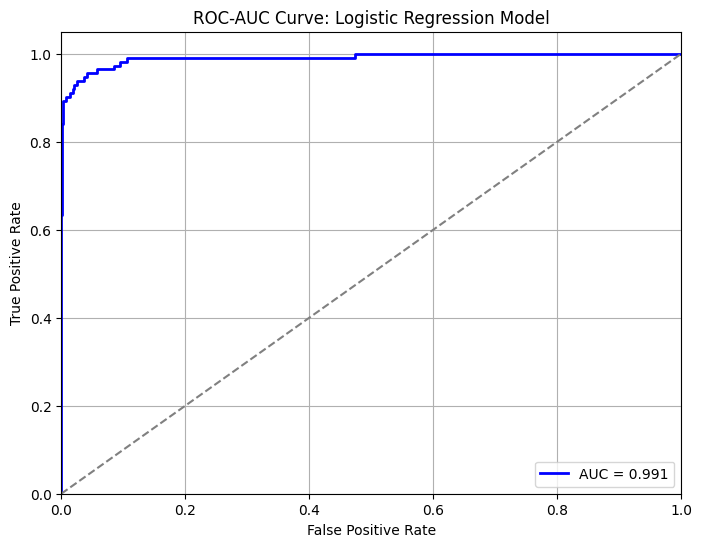

AUC Score: 0.9907877861089187


In [32]:
roc_auc = plot_roc_auc(fitted_logistic_model, X_test_tfidf, y_test, model_name="Logistic Regression Model")
print("AUC Score:", roc_auc)


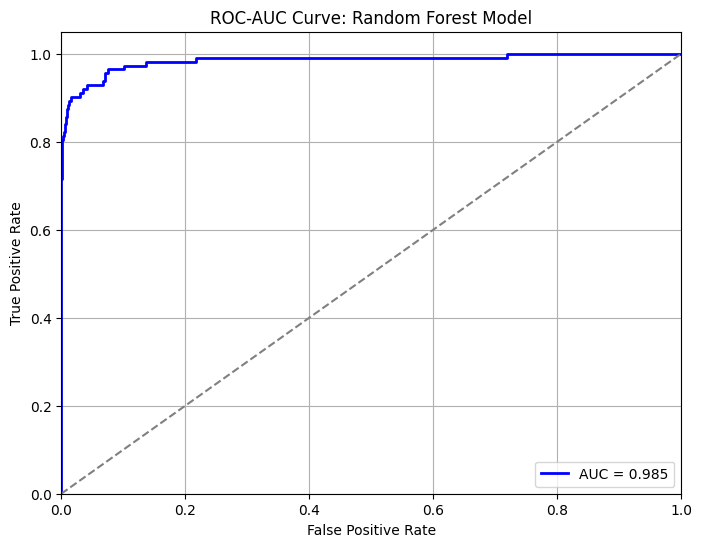

AUC Score: 0.9851026045777427


In [29]:
roc_auc = plot_roc_auc(fitted_rf_model, X_test_tfidf, y_test, model_name="Random Forest Model")
print("AUC Score:", roc_auc)

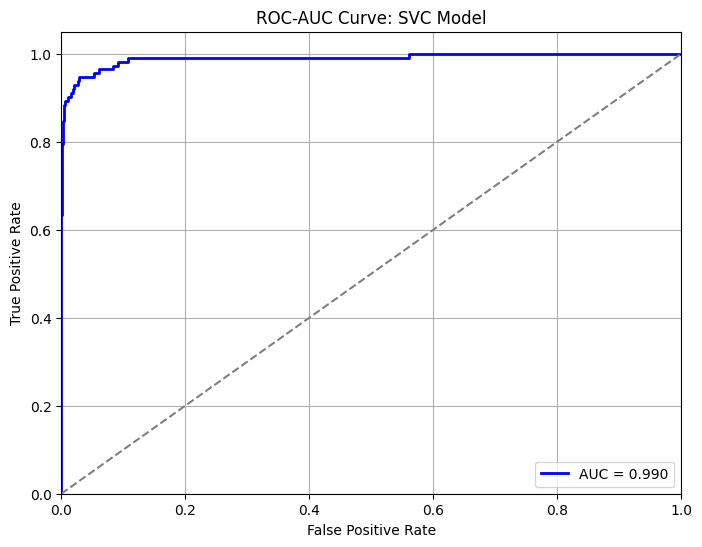

AUC Score: 0.9898135359116023


In [30]:
roc_auc = plot_roc_auc(fitted_svc_model, X_test_tfidf, y_test, model_name="SVC Model")
print("AUC Score:", roc_auc)

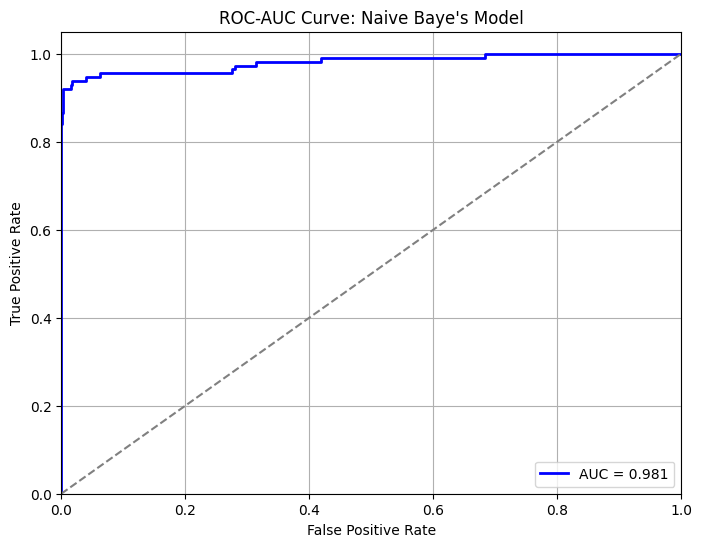

AUC Score: 0.9810206195737964


In [31]:
roc_auc = plot_roc_auc(fitted_nb_model, X_test_tfidf, y_test, model_name="Complement Naive Baye's Model")
print("AUC Score:", roc_auc)

| Model              | AUC    | Accuracy | Precision | Recall  | F1-Score |
|--------------------|--------|----------|-----------|---------|----------|
| Logistic Regression| 0.9907 | 0.9725   | 0.8803    | 0.9196  | 0.8996   |
| Random Forest      | 0.985  | 0.9725   | 0.9684    | 0.8214  | 0.8888   |
| SVC                | 0.9898 | 0.9761   | 0.9181    | 0.9018  | 0.9099   |
| Complement NB      | 0.981  | 0.9761   | 0.8898    | 0.9375  | 0.9130   |


The best overall model is Logistic Regression.
* Highest AUC (0.9907) → Best overall classification.
* Balanced recall & precision → Less overfitting risk.